In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
# Load the data from the CSV file
df = pd.read_csv('afinn_sentiment_scores.csv')

In [3]:
# Preprocess 'sentiment_scores' column and compute the average sentiment score for each row

df['sentiment_scores'] = df['sentiment_scores'].apply(lambda scores: np.mean([float(score.strip(',')) for score in scores.split()]))

In [4]:
# Select relevant columns for correlation analysis

selected_columns = ['sentiment_scores', 'Open_x', 'High_x', 'Low_x', 'Close_x', 'Adj Close_x', 'Volume_x', 'percent_chnage_x']

In [5]:
correlation_matrix = df[selected_columns].corr()
print(correlation_matrix)

                  sentiment_scores    Open_x    High_x     Low_x   Close_x  \
sentiment_scores          1.000000  0.542627  0.532076  0.534533  0.513936   
Open_x                    0.542627  1.000000  0.988694  0.992437  0.974029   
High_x                    0.532076  0.988694  1.000000  0.990840  0.990120   
Low_x                     0.534533  0.992437  0.990840  1.000000  0.989054   
Close_x                   0.513936  0.974029  0.990120  0.989054  1.000000   
Adj Close_x               0.513936  0.974029  0.990120  0.989054  1.000000   
Volume_x                 -0.231054 -0.157045 -0.144442 -0.181986 -0.178465   
percent_chnage_x         -0.131542 -0.121426 -0.001581 -0.022387  0.106372   

                  Adj Close_x  Volume_x  percent_chnage_x  
sentiment_scores     0.513936 -0.231054         -0.131542  
Open_x               0.974029 -0.157045         -0.121426  
High_x               0.990120 -0.144442         -0.001581  
Low_x                0.989054 -0.181986         -0.022387

In [7]:
# Split the data into features (X) and target (y)

X = df['sentiment_scores'].values.reshape(-1, 1)  # Feature variable (sentiment scores)
y = df['Close_x'].values  # Target variable (S&P 500 close index)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Model Selection and Training

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
#Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 18161.834040511647
Root Mean Squared Error: 134.7658489399731
R-squared: 0.25246618584487523


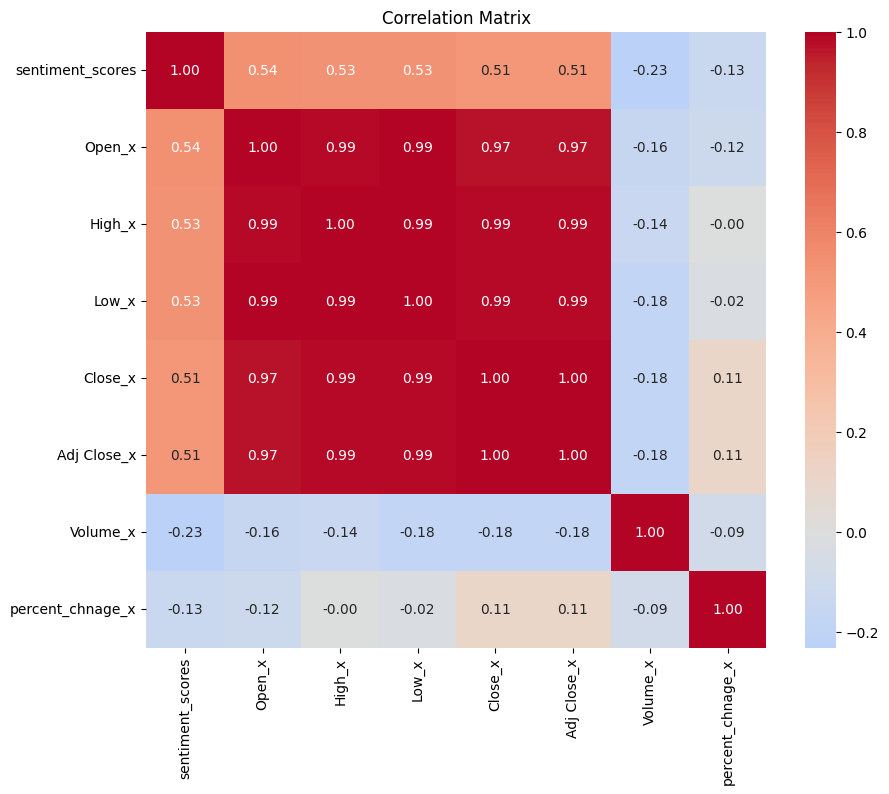

In [11]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title("Correlation Matrix")
plt.show()

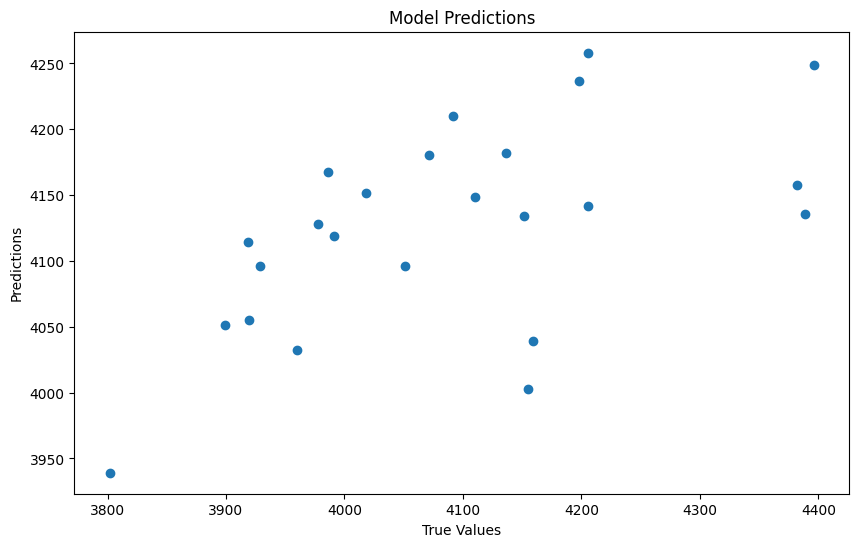

In [12]:
# Visualize the model predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Model Predictions")
plt.show()

XGBoost

In [ ]:
pip install xgboost

In [13]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Model Training (XGBoost)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [14]:
# Train-Test Split

X = df[['sentiment_scores']]  # Features: Use sentiment_scores as the feature
y = df['Close_y']  # Target variable: Nasdaq close index

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Training (XGBoost)
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

In [16]:
# Model Evaluation

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 64389966.44474403
Root Mean Squared Error: 8024.335888080958
R-squared: -97.79357763400728


In [17]:
import scipy.stats as stats

# Statistical Analysis
# Perform statistical tests to explore the relationship between sentiment scores and the Nasdaq index.

# Calculate the correlation coefficient between 'sentiment_scores' and 'close'

correlation_coefficient, p_value = stats.pearsonr(df['sentiment_scores'], df['Close_y'])

print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient: 0.3886188549891359
p-value: 1.2566307351452311e-05


In [18]:
# Conclusion and Interpretation
# Summarize the findings and draw conclusions based on the XGBoost model and analysis.

# Print the correlation coefficient and its interpretation

if correlation_coefficient > 0:
    print("The sentiment scores are positively correlated with the Nasdaq index.")
elif correlation_coefficient < 0:
    print("The sentiment scores are negatively correlated with the Nasdaq index.")
else:
    print("There is no correlation between the sentiment scores and the Nasdaq index.")

# Print the p-value and its significance level
if p_value < 0.05:
    print("The p-value is less than 0.05, indicating a significant correlation.")
else:
    print("The p-value is greater than or equal to 0.05, indicating no significant correlation.")


The sentiment scores are positively correlated with the Nasdaq index.
The p-value is less than 0.05, indicating a significant correlation.


In [19]:
# Create binary sentiment labels based on the threshold (0 in this example)

threshold = 0
df['sentiment_label'] = df['sentiment_scores'].apply(lambda score: 1 if score > threshold else 0)

# Perform train-test split for sentiment analysis (if not done before)
X_sentiment = df[['sentiment_scores']]  # Feature variable (sentiment scores) for sentiment analysis
y_sentiment = df['sentiment_label']  # Target variable (binary sentiment labels)

X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Model Training (XGBoost for Sentiment Analysis)
model_sentiment = xgb.XGBClassifier()
model_sentiment.fit(X_train_sentiment, y_train_sentiment)

# Model Evaluation (Sentiment Analysis)
y_pred_sentiment = model_sentiment.predict(X_test_sentiment)

# Print the Classification Report for Sentiment Analysis
print("Classification Report for Sentiment Analysis:")
print(classification_report(y_test_sentiment, y_pred_sentiment))

# Print the Confusion Matrix for Sentiment Analysis
conf_matrix_sentiment = confusion_matrix(y_test_sentiment, y_pred_sentiment)
print("Confusion Matrix for Sentiment Analysis:")
print(conf_matrix_sentiment)

Classification Report for Sentiment Analysis:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         3

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Confusion Matrix for Sentiment Analysis:
[[21  0]
 [ 0  3]]
